# Clustering and Regression

In [1]:
%matplotlib inline
from __future__ import print_function

import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

# Plot the data

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Now we generate some sample data.

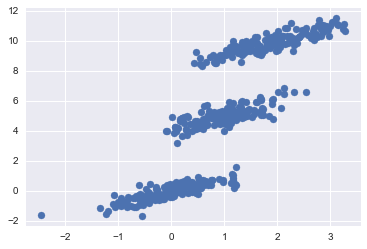

In [2]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

## Find Clusters


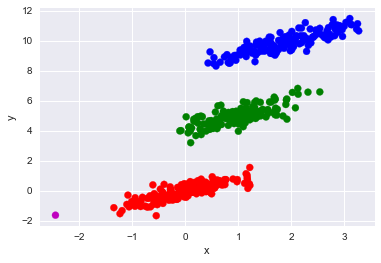

In [3]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Add Cluster Labels back to the Data Frame and Fit a Linear Model

In [4]:
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
0,-1.190334,-1.331646,0,0,1,0,0
1,0.761543,0.713381,0,0,1,0,0
2,-0.297639,-0.543836,0,0,1,0,0
3,1.180210,0.145635,0,0,1,0,0
4,-0.039793,0.272099,0,0,1,0,0
5,-0.546532,-1.670994,0,0,1,0,0
6,0.550880,0.644389,0,0,1,0,0
7,-0.381643,-0.554311,0,0,1,0,0
8,0.508448,0.925097,0,0,1,0,0
9,0.537676,0.738554,0,0,1,0,0


In [5]:
model = LinearRegression()
X = df[["x", "cluster_0", "cluster_1", "cluster_2"]]
y = df['y']
model.fit(X, y)

print(model.score(X, y))

0.992357736061


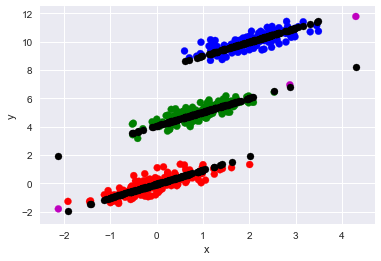

In [15]:
# Plot the model
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()


## Another example

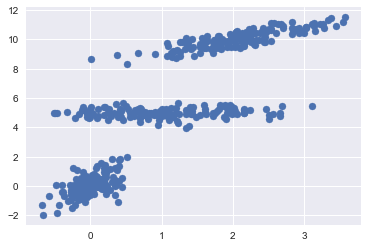

In [6]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.1, 0.5],[0,0.2]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.6, 0.],[0.2 ,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

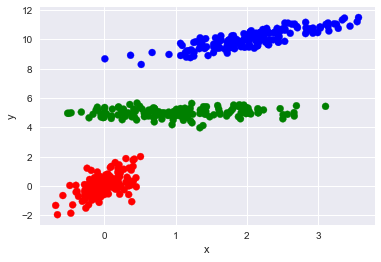

In [7]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
df["cluster"] = labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Modeling

This time we have to fit a model to each cluster since they are not the same shape with offsets.

In [8]:
from collections import Counter

counts = Counter(labels)
print(counts)

Counter({0: 150, 1: 150, 2: 150})


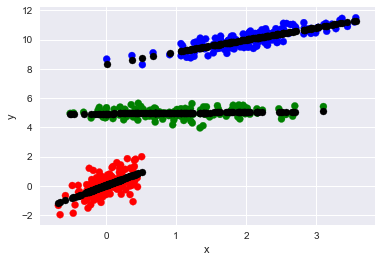

In [9]:
# Plot the raw data
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

# Fit a model to each cluster
models = dict()
for label in set(labels):
    if counts[label] > 10:
        model = LinearRegression()
        subdf = df[df["cluster"] == label]
        X = subdf[['x']]
        y = subdf[['y']]
        model.fit(X, y)
        models["label"] = model
        plt.scatter(X, model.predict(X), color="black")

plt.show()
    